In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
test_data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\filtered_test_data.csv')
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,230,1016.53,24.0,0.0,1,...,9.6,20.8,9.5,4.6,4.8,0.4,Canada,44.710000,-63.630000,3.5
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,280,1015.60,24.1,0.0,1,...,39.0,310.7,59.4,3.0,9.6,1.5,Canada,52.183056,-122.054170,939.7
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,350,1021.90,24.1,4.3,0,...,14.3,481.2,26.6,0.4,0.5,0.0,Canada,64.110000,-117.330000,221.0
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,300,1004.80,19.9,7.2,0,...,0.1,0.4,0.1,0.0,0.0,0.0,Canada,47.613056,-57.610280,6.7
4,2012-04-08 12:00:00,4.9,-10.5,31.0,32.3,330,1029.73,34.2,0.0,12,...,17.5,426.9,31.7,17.3,26.2,8.8,Canada,51.820000,-111.680000,804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289829,2014-07-19 12:00:00,24.0,13.0,50.0,13.0,130,1025.20,16.1,0.0,2,...,14.0,79.4,19.5,5.7,8.7,1.3,United States,43.645645,-70.308620,23.1
289830,2011-09-28 12:00:00,14.8,4.5,51.0,14.0,240,1015.74,36.2,0.0,4,...,5.0,177.0,10.0,5.1,5.0,0.5,France,43.914722,2.116389,172.0
289831,2010-08-15 12:00:00,21.0,20.0,94.0,13.0,140,1010.00,14.5,6.0,0,...,19.6,296.5,33.7,0.1,0.1,0.0,Canada,45.950000,-77.316666,130.1
289832,2019-06-30 12:00:00,26.9,16.3,52.0,9.9,32,1016.20,17.7,0.0,1,...,17.7,99.3,24.5,4.9,8.7,1.2,Canada,41.948612,-82.518890,176.8


In [3]:
test_data = test_data.iloc[:20000]       
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,230,1016.53,24.0,0.00,1,...,9.6,20.8,9.5,4.6,4.8,0.4,Canada,44.710000,-63.63000,3.5
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,280,1015.60,24.1,0.00,1,...,39.0,310.7,59.4,3.0,9.6,1.5,Canada,52.183056,-122.05417,939.7
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,350,1021.90,24.1,4.30,0,...,14.3,481.2,26.6,0.4,0.5,0.0,Canada,64.110000,-117.33000,221.0
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,300,1004.80,19.9,7.20,0,...,0.1,0.4,0.1,0.0,0.0,0.0,Canada,47.613056,-57.61028,6.7
4,2012-04-08 12:00:00,4.9,-10.5,31.0,32.3,330,1029.73,34.2,0.00,12,...,17.5,426.9,31.7,17.3,26.2,8.8,Canada,51.820000,-111.68000,804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-08-22 12:00:00,16.0,4.0,45.0,7.4,20,1016.10,8.0,0.00,3,...,140.3,598.0,176.8,8.1,33.3,13.4,United States,42.905860,-106.46364,1628.9
19996,2013-10-05 12:00:00,14.7,-0.9,34.0,19.2,295,1020.50,22.0,0.00,1,...,26.0,323.0,43.3,9.5,19.9,5.4,Canada,49.900000,-109.47000,766.7
19997,2014-04-27 12:00:00,9.0,-5.0,37.0,14.8,140,1002.10,24.1,0.01,1,...,9.0,69.0,13.5,5.4,6.9,0.8,Canada,52.183056,-122.05417,939.7
19998,2018-09-30 12:00:00,12.9,5.1,59.0,9.0,232,1024.40,16.5,0.20,0,...,3.2,119.9,6.1,1.4,0.7,0.0,Canada,47.420000,-68.32000,154.2


In [5]:
test_data = test_data.drop(['wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,1016.53,0.00,1,87.9,9.6,20.8,9.5,4.6,4.8,Canada
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,1015.60,0.00,1,86.1,39.0,310.7,59.4,3.0,9.6,Canada
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,1021.90,4.30,0,53.6,14.3,481.2,26.6,0.4,0.5,Canada
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,1004.80,7.20,0,33.2,0.1,0.4,0.1,0.0,0.0,Canada
4,2012-04-08 12:00:00,4.9,-10.5,31.0,32.3,1029.73,0.00,12,88.4,17.5,426.9,31.7,17.3,26.2,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-08-22 12:00:00,16.0,4.0,45.0,7.4,1016.10,0.00,3,91.9,140.3,598.0,176.8,8.1,33.3,United States
19996,2013-10-05 12:00:00,14.7,-0.9,34.0,19.2,1020.50,0.00,1,88.8,26.0,323.0,43.3,9.5,19.9,Canada
19997,2014-04-27 12:00:00,9.0,-5.0,37.0,14.8,1002.10,0.01,1,86.4,9.0,69.0,13.5,5.4,6.9,Canada
19998,2018-09-30 12:00:00,12.9,5.1,59.0,9.0,1024.40,0.20,0,77.5,3.2,119.9,6.1,1.4,0.7,Canada


In [6]:
# Load saved PowerTransformer dictionary
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

# Load saved StandardScaler
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load saved OneHotEncoding
with open(r'E:\Info_Srping\FWI_Prediction\models\\Pkl_files_after_outlier_remover\one_hot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)
    
# Load saved LR_Model
with open('VIF_Linear_Regression_model.pkl', 'rb') as f:
    LR_model = pickle.load(f)

In [7]:
col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']
for col, pt in power_transformers.items():
    # Transform test column using fitted transformer
    transformed = pt.transform(test_data[col].values.reshape(-1, 1))
    test_data[col + '_transformed'] = transformed.flatten()


In [8]:
numeric_cols = test_data.select_dtypes(include=['float64', 'int']).columns
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

In [9]:
test_data = test_data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [10]:
test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
test_data['RH_TEMP'] = test_data['temperature'] * test_data['relative_humidity']
test_data['RD_FFMC'] =  test_data['fine_fuel_moisture_code_transformed'] * test_data['rain_days']
test_data['DC_RD'] =  test_data['drought_code_transformed'] * test_data['rain_days']
test_data['WS_TENP'] =  test_data['wind_speed_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['IST_WS'] =  test_data['wind_speed_transformed'] * test_data['initial_spread_index_transformed']
test_data['ISI_FFMC'] =  test_data['initial_spread_index_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['ISI_RH'] =  test_data['initial_spread_index_transformed'] * test_data['relative_humidity']
test_data['DMC_TEMP'] =  test_data['duff_moisture_code_transformed'] * test_data['temperature']
test_data['DMC_RD'] =  test_data['duff_moisture_code_transformed'] * test_data['rain_days']
test_data['RD_TEMP'] =  test_data['rain_days'] * test_data['temperature']
test_data['DMC_DC'] =  test_data['drought_code_transformed'] * test_data['duff_moisture_code_transformed']
test_data['BUI_DC'] =  test_data['drought_code_transformed'] * test_data['build_up_index_transformed']
test_data['BUI_DMC'] =  test_data['duff_moisture_code_transformed'] * test_data['build_up_index_transformed']

C:\Users\DELL\AppData\Local\Temp\ipykernel_612\3843077778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_612\3843077778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_612\3843077778.py:3: SettingWithCopyWarnin

In [11]:
encoded_array = ohe.transform(test_data[['country']])  
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['country']))
new_data_encoded = pd.concat([test_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [12]:
new_data_encoded['ISI_Squared'] = new_data_encoded['initial_spread_index_transformed'] ** 2
new_data_encoded['BUI_Squared']   = new_data_encoded['build_up_index_transformed'] ** 2
new_data_encoded['DMC_Squared']   = new_data_encoded['duff_moisture_code_transformed'] ** 2

In [15]:
X = new_data_encoded.drop(['fire_weather_index_transformed','BUI_DMC','build_up_index_transformed','country_United States',
                           'BUI_DC','initial_spread_index_transformed','dew_point_temperature','country',], axis = 1)
y = new_data_encoded['fire_weather_index_transformed']

In [16]:
# Predict on the features
y_test_pred = LR_model.predict(X)

# Evaluate if target is available
if y is not None:
    from sklearn.metrics import r2_score, mean_squared_error
    print('Test R²:', r2_score(y, y_test_pred))
    print('Test MSE:', mean_squared_error(y, y_test_pred))


Test R²: 0.982172108172523
Test MSE: 0.017761353165821375


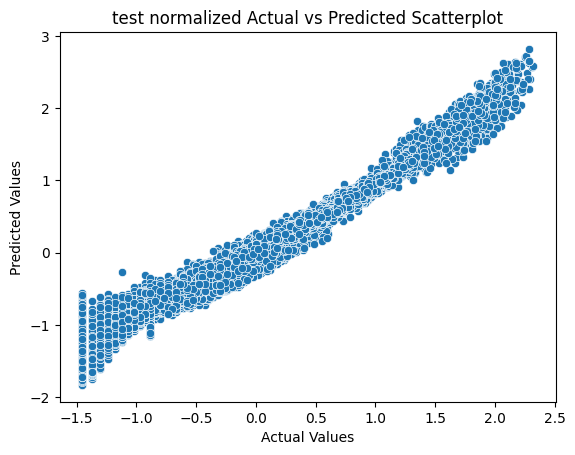

In [17]:
sns.scatterplot(x=y, y=y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('test normalized Actual vs Predicted Scatterplot')
plt.savefig('test_normalized+Act_vs_pred.png')
plt.show()


In [18]:
# number of features scaler was trained on
n_features = len(scaler.mean_)  

# index of target column inside scaler
col_index = list(scaler.feature_names_in_).index('fire_weather_index_transformed')

def inverse_single_column(scaler, values, col_index):
    """
    Inverse transform only one column of a StandardScaler.
    values: (n_samples,) array in scaled space for target column
    col_index: index of target column inside scaler.feature_names_in_
    """
    # create dummy matrix with correct number of features
    dummy = np.zeros((len(values), n_features))
    dummy[:, col_index] = values  # put values only in target column
    
    # inverse transform all features
    inv = scaler.inverse_transform(dummy)
    
    # extract only target column (now back in power-transform space)
    return inv[:, col_index]

In [19]:
# Step 1: inverse StandardScaler
y_train_pred_power = inverse_single_column(scaler, y_test_pred, col_index)
y_train_power = inverse_single_column(scaler, y, col_index)

# Step 2: inverse PowerTransformer
pt = power_transformers['fire_weather_index']
y_train_pred_orig = pt.inverse_transform(y_train_pred_power.reshape(-1, 1)).ravel()
y_train_orig = pt.inverse_transform(y_train_power.reshape(-1, 1)).ravel()

# Step 3: evaluate metrics
from sklearn.metrics import r2_score, mean_squared_error

train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)
train_mse_orig = mean_squared_error(y_train_orig, y_train_pred_orig)

print('Original scale R²:', train_r2_orig)
print('Original scale MSE:', train_mse_orig)

Original scale R²: 0.9230774263643147
Original scale MSE: 13.002095801538822


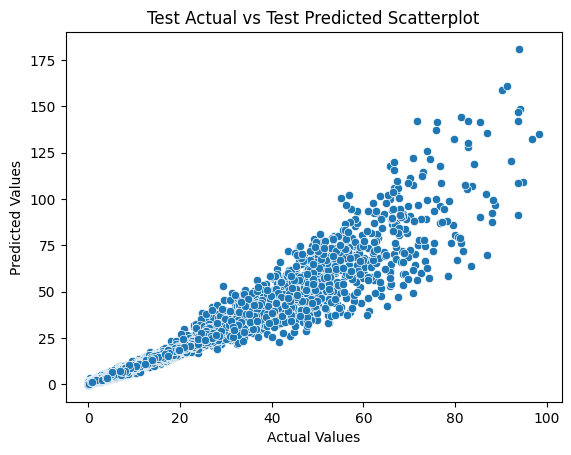

In [20]:
sns.scatterplot(x=y_train_orig, y=y_train_pred_orig)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Actual vs Test Predicted Scatterplot')
plt.savefig('Act_vs_pred_test.png')
plt.savefig("test_data.png")
plt.show()


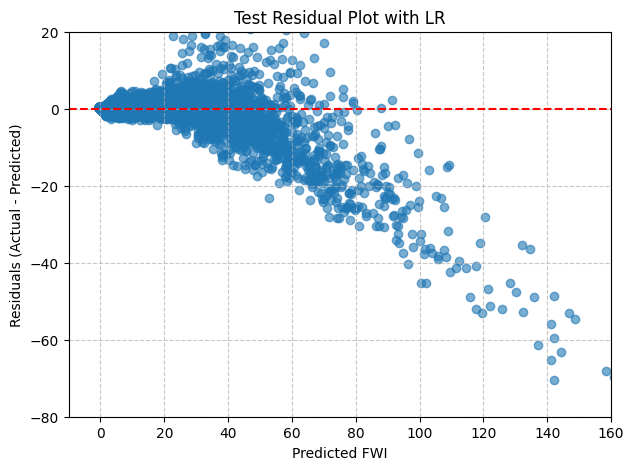

In [21]:
from matplotlib.ticker import MultipleLocator
# Compute residuals
train_residuals = y_train_orig - y_train_pred_orig

# Train residual plot
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred_orig, train_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Test Residual Plot with LR")
plt.ylim(-80, 20)
plt.xlim(-10, 160)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.savefig("Pure_LR_Test_Residual_Plot.png")
plt.show()
